In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('Social_Network_Ads.csv')

In [46]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [47]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
326,15713463,Male,41,72000,0
144,15622833,Female,34,25000,0
278,15613014,Female,52,38000,1
107,15789863,Male,27,89000,0
173,15581654,Female,34,43000,0


In [48]:
df=df.iloc[:,2:] # as we are doing standerdization on age and sal col   and the target Purchased

In [49]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Train test split

In [37]:
X=df.iloc[:,:-1]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [38]:
y = df.iloc[:,-1]

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_train,X_test, y_train,y_test = train_test_split(df.drop('Purchased', asix=1),
                                                # df['Purchased'], random_state=0)

In [50]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [51]:
y_train.shape, y_test.shape

((280,), (120,))

# Standard Scaler

In [53]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()     # creating object of StandardScaler

# fit the trainging data to the scaler object
scaler.fit(X_train)

# transform the train and test data set to standard form 
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [54]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [56]:
scaler.mean_    # mean of both cols

array([3.78642857e+01, 6.98071429e+04])

In [57]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [58]:
X_train_scaler

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [83]:
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)     # this will convert the ndarray to DF and add col index as X_test
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)

In [84]:
X_test_scaler

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [65]:
X_train_scaler

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [68]:
np.round(X_train.describe(),1)   # this will round the number after . to 1

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [69]:
np.round(X_train_scaler.describe())  # here the mean and std changes to 0 and 1 which is satndardization

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


# Effect of scalling 

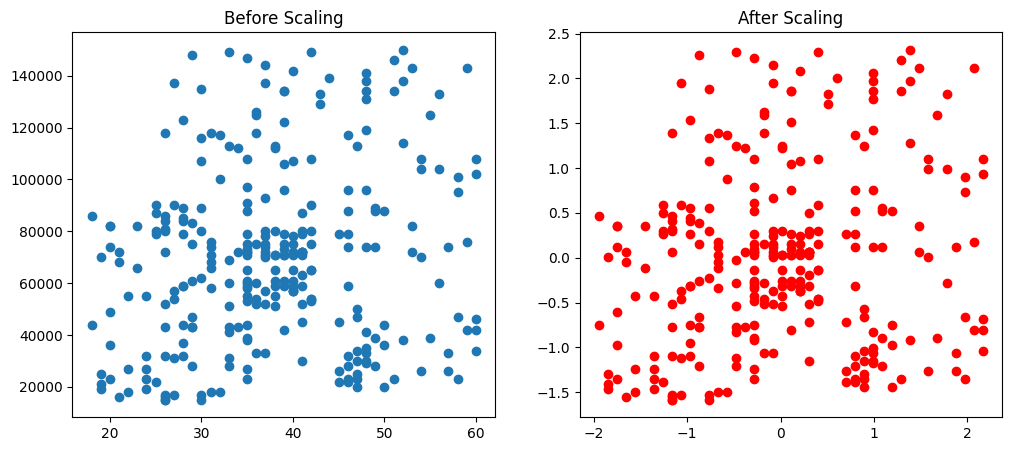

In [92]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaler['Age'], X_train_scaler['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After scaling'}, xlabel='Age', ylabel='Density'>

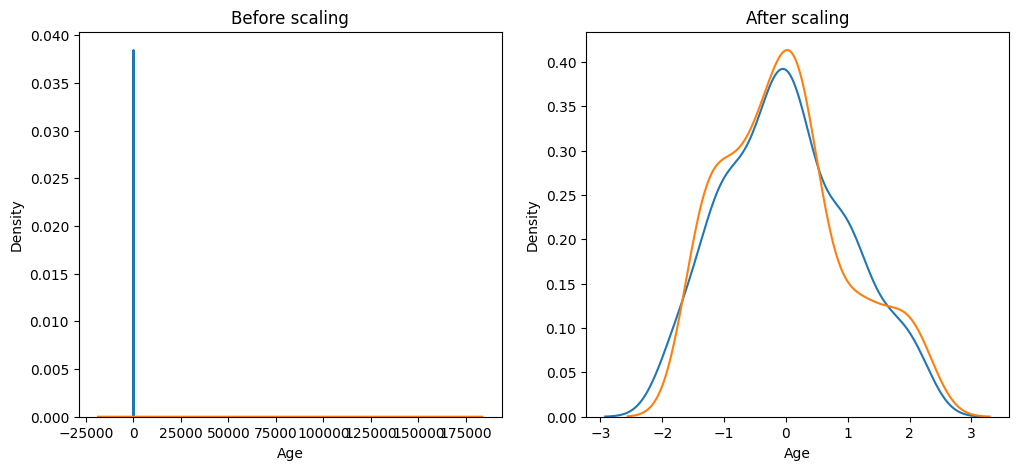

In [104]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))

# before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)   # no comarision

# After scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaler['Age'], ax=ax2)
sns.kdeplot(X_train_scaler['EstimatedSalary'], ax=ax2)  # can compair afte scaling

# Comparison of Distributions

<Axes: title={'center': 'Age Distribution After Standard Scaling'}, xlabel='Age', ylabel='Density'>

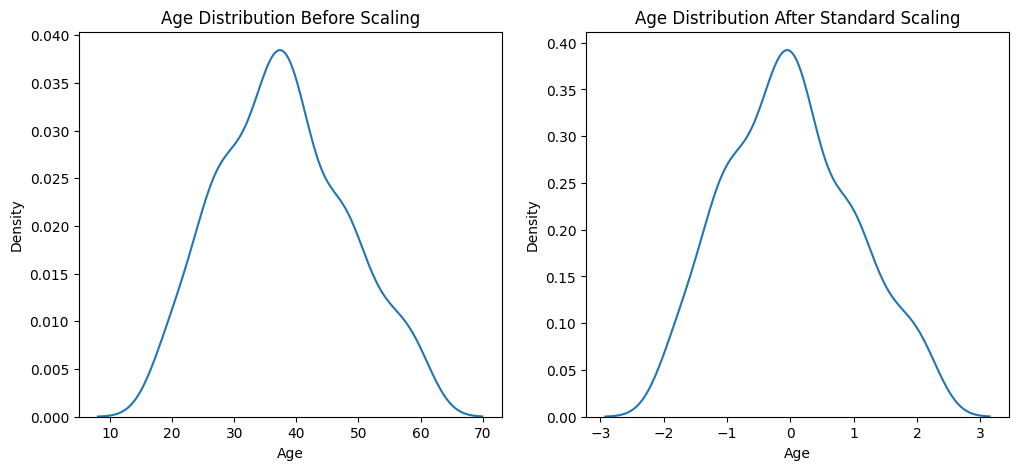

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(12,5))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaler['Age'], ax=ax2)    # distribution will be same after and befor scalling

<Axes: title={'center': 'Sal Distribution After Standard Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

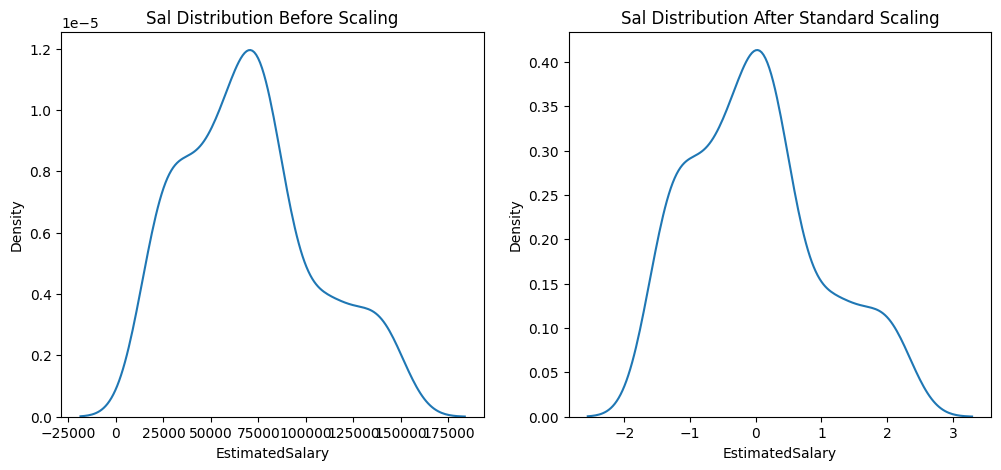

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(12,5))

ax1.set_title('Sal Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Sal Distribution After Standard Scaling')
sns.kdeplot(X_train_scaler['EstimatedSalary'], ax=ax2)

# Why scaling is important?

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [116]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaler, y_train)

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [117]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaler)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [120]:
from sklearn.metrics import accuracy_score

In [123]:
print('Actual ', accuracy_score(y_test,y_pred))
print('After_scale ', accuracy_score(y_test, y_pred_scaled))

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual  0.875
After_scale  0.8666666666666667


In [124]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [132]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000, 250000, 350000], 'Purchased':[0,1,1]})],ignore_index=True)
#df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)

In [134]:
df  # 3 rows are added in DF

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


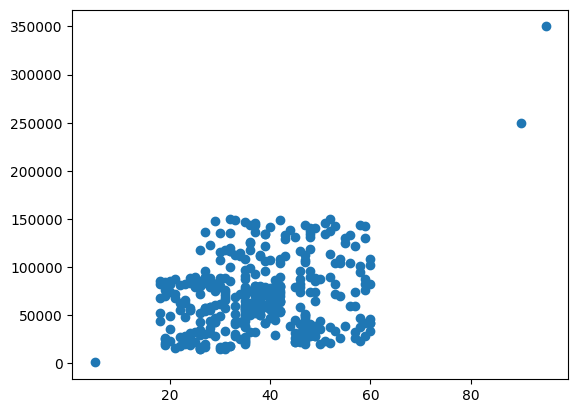

In [135]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'], test_size=0.3, random_state=0)

In [139]:
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [142]:
from sklearn.preprocessing import StandardScaler

In [146]:
scaler1 = StandardScaler()
scaler1.fit(X_train)

StandardScaler()

In [148]:
X_train_scaled = scaler1.transform(X_train)
X_test_scaled = scaler1.transform(X_test)

In [151]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [153]:
X_test_scaled
X_train_scaled

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


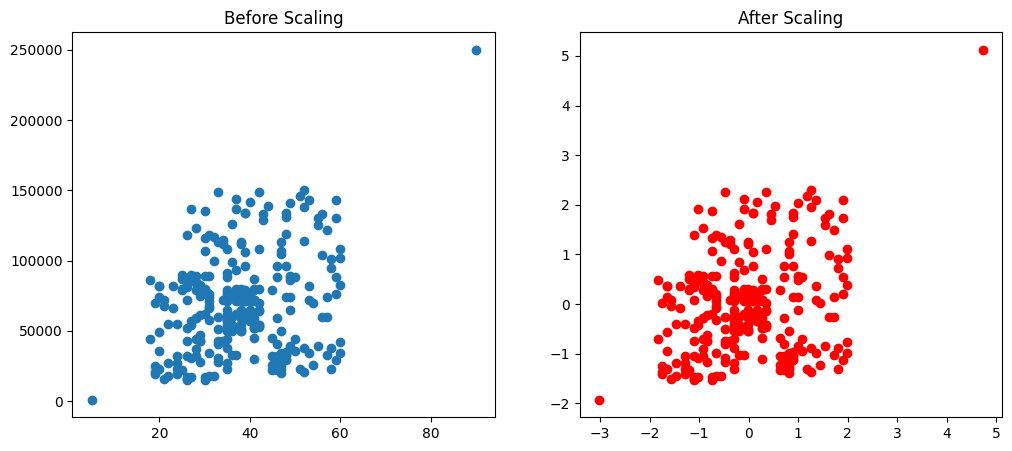

In [154]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()